In [653]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import random as rand
import math
%matplotlib inline  

fire = pd.read_csv('flame.txt', header=None)

In [654]:
fire.iloc[1]
fire[0][1]

'1.35\t26.65\t1'

In [655]:
fire = fire[0].apply(lambda x: str(x).split('\t'))

In [656]:
dataset = pd.DataFrame(columns=['x', 'y', 'group', 'closest_centroid_x', 'closest_centroid_y'])
dataset['x'] = fire.apply(lambda entry: float(entry[0]))
dataset['y'] = fire.apply(lambda entry: float(entry[1]))
dataset['group'] = fire.apply(lambda entry: int(entry[2]))

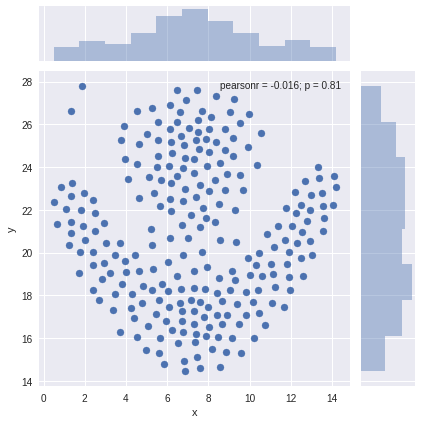

In [657]:
sb.jointplot(x='x', y='y', data=dataset)

In [658]:
k = 2

In [659]:
centroids = list(range(k))

def create_centroids(xmax, ymax):
    #create an initial centroid for each k
    for group in range(k):
        centroids[group] = []
        #make [x,y] coordinates between 0 and xmax,ymax
        centroids[group].append(rand.uniform(0, xmax))
        centroids[group].append(rand.uniform(0, ymax))

In [660]:
# create centroids (xmax, ymax)
create_centroids(14, 28)

In [661]:
# helper to get euclidian distance
def euclidian_distance(a, b):
    sqrtsum = math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2)
    return math.sqrt(sqrtsum)

In [662]:
euclidian_distance([1,2], [3,4])

2.8284271247461903

In [663]:
def compute_closest_centroid(x,y, centroids):
    closest_range = euclidian_distance([x, y], centroids[0])
    closest_centroid = centroids[0]
    
    for centroid in centroids:
        this_range = euclidian_distance([x, y], centroid)
        if(this_range < closest_range):
            closest_range = this_range
            closest_centroid = centroid
    return closest_centroid

In [664]:
# test it for one dataset [x, y] point
get_nearest_centroid(dataset.iloc[1]['x'], dataset.iloc[1]['y'], centroids)

[4.946673465122615, 20.07560655846159]

In [665]:
def add_closest_centroid(dataset, centroids):
    for index in range(len(dataset)):
        x = dataset.iloc[index]['x']
        y = dataset.iloc[index]['y']
        closest_centroid = compute_closest_centroid(x,y,centroids)
        dataset['closest_centroid_x'][index] = closest_centroid[0]
        dataset['closest_centroid_y'][index] = closest_centroid[1]

In [666]:
add_closest_centroid(dataset, centroids)

/home/bender/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/bender/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


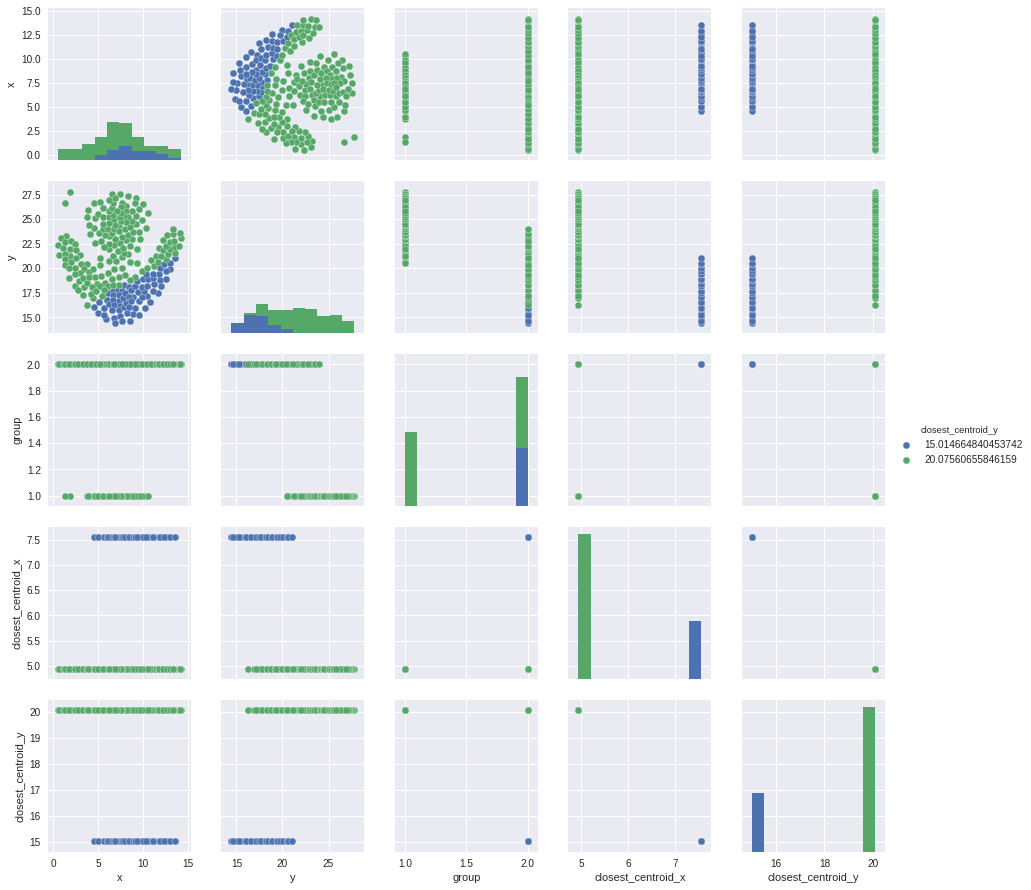

In [671]:
sb.pairplot(dataset, hue='closest_centroid_y')

In [668]:
centroids

[[7.5508464147741705, 15.014664840453742],
 [4.946673465122615, 20.07560655846159]]

In [723]:
def compute_centroids(dataset):
    old_centroids = centroids
    new_centroids = []
    for centroid in old_centroids:
        x = 0
        y = 0
        group = dataset[(dataset['closest_centroid_x'] == centroid[0]) and (dataset['closest_centroid_y'] == centroid[1])]
        group_entries = group.count()
        
        mean_x = group['closest_centroid_x'].sum() / group_entries
        mean_y = group['closest_centroid_y'].sum() / group_entries     
        new_centroids.append([mean_x, mean_y])

In [733]:
#compute_centroids(dataset)
#dataset[dataset['closest_centroid_x'] == centroids[1][0]]
for centroid in centroids:
        x = 0
        y = 0
        group = dataset[(dataset['closest_centroid_x'] == centroid[0]) & (dataset['closest_centroid_y'] == centroid[1])]

group['closest_centroid_x'].unique()
https://github.com/llSourcell/k_means_clustering/blob/master/kmeans.py.ipynb

array([4.946673465122615], dtype=object)